In [1]:
class GameOfLife(object):
    """
    A class to simulate Conway's Game of Life on a 2D grid.
    
    Conway's Game of Life is a cellular automaton devised by mathematician John Conway.
    The grid evolves based on simple rules applied to each cell and its neighbors.

    Attributes:
        x_dim (int): The number of columns in the grid.
        y_dim (int): The number of rows in the grid.
        life_grid (list of list of int): A 2D grid representing the game state, where 0 is dead, and 1 is alive.
    """

    def __init__(self, x_dim, y_dim):
        """
        Initialize the Game of Life grid with given dimensions.
        
        :param x_dim: Number of columns in the grid.
        :param y_dim: Number of rows in the grid.
        """
        self.x_dim = x_dim
        self.y_dim = y_dim
        # Create a 2D grid filled with zeros, representing all cells as dead.
        self.life_grid = [[0 for _ in range(self.x_dim)] for _ in range(self.y_dim)]

    def get_grid(self):
        """
        Retrieve the current state of the grid.

        :return: A 2D list representing the grid.
        """
        return self.life_grid

    def print_grid(self):
        """
        Print the current state of the grid in a human-readable format.

        Each row is displayed on a new line with cells separated by spaces.
        """
        for row in self.life_grid:
            print(' '.join(map(str, row)))

    def populate_grid(self, coord):
        """
        Populate the grid with live cells at specified coordinates.

        :param coord: A list of tuples [(x1, y1), (x2, y2), ...] specifying the positions of live cells.
        :raises: A warning if any coordinate is out of bounds.
        """
        for x, y in coord:
            if 0 <= x < self.x_dim and 0 <= y < self.y_dim:  # Ensure coordinates are within bounds.
                self.life_grid[y][x] = 1  # Set the cell to alive.
            else:
                print(f"Warning: Coordinate ({x}, {y}) is out of bounds.")

    def count_neighbours(self, y, x):
        """
        Count the number of live neighbors around a specific cell.

        :param y: Row index of the cell.
        :param x: Column index of the cell.
        :return: The number of live neighbors (integer).
        """
        # Define relative positions for all 8 neighbors.
        directions = [(-1, -1), (-1, 0), (-1, 1),
                      (0, -1),          (0, 1),
                      (1, -1), (1, 0), (1, 1)]
        count = 0
        for dy, dx in directions:
            ny, nx = y + dy, x + dx
            # Check if the neighbor is within the bounds of the grid.
            if 0 <= ny < self.y_dim and 0 <= nx < self.x_dim:
                count += self.life_grid[ny][nx]
        return count

    def make_step(self):
        """
        Advance the grid to the next generation using Conway's rules.

        Rules:
        1. Any live cell with fewer than two live neighbors dies (underpopulation).
        2. Any live cell with two or three live neighbors survives.
        3. Any live cell with more than three live neighbors dies (overpopulation).
        4. Any dead cell with exactly three live neighbors becomes alive (reproduction).

        :return: The updated grid (2D list).
        """
        # Create a new grid to store the next generation.
        new_grid = [[0 for _ in range(self.x_dim)] for _ in range(self.y_dim)]

        for i in range(self.y_dim):
            for j in range(self.x_dim):
                # Count the live neighbors of the current cell.
                live_neighbours = self.count_neighbours(i, j)

                # Apply Conway's rules.
                if self.life_grid[i][j] == 1:  # If the cell is alive.
                    if live_neighbours < 2 or live_neighbours > 3:
                        new_grid[i][j] = 0  # Cell dies.
                    else:
                        new_grid[i][j] = 1  # Cell survives.
                else:  # If the cell is dead.
                    if live_neighbours == 3:
                        new_grid[i][j] = 1  # Cell becomes alive.

        # Update the grid with the new generation.
        self.life_grid = new_grid
        return self.life_grid

    def make_n_steps(self, n):
        """
        Simulate multiple generations of the grid by applying `make_step` n times.

        :param n: Number of steps (generations) to simulate.
        :return: The final grid (2D list) after n steps.
        """
        for _ in range(n):
            self.make_step()
        return self.life_grid

    def draw_grid(self):
        """
        Visualize the current state of the grid using Matplotlib.

        Live cells are displayed as white squares, and dead cells are displayed as black squares.
        """
        import matplotlib.pyplot as plt
        plt.imshow(self.life_grid, cmap='binary')  # Display the grid as a binary image.
        plt.show()

In [2]:
# Initialize the game with a 10x10 grid.
game = GameOfLife(10, 10)

In [3]:
# Populate the grid with a "blinker" pattern.
game.populate_grid([(1, 2), (2, 2), (3, 2)])

In [4]:
# Print the initial grid.
print("Initial grid:")
game.print_grid()

Initial grid:
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
0 1 1 1 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0


In [5]:
# Simulate one generation.
game.make_step()
print("\nAfter 1 step:")
game.print_grid()


After 1 step:
0 0 0 0 0 0 0 0 0 0
0 0 1 0 0 0 0 0 0 0
0 0 1 0 0 0 0 0 0 0
0 0 1 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0


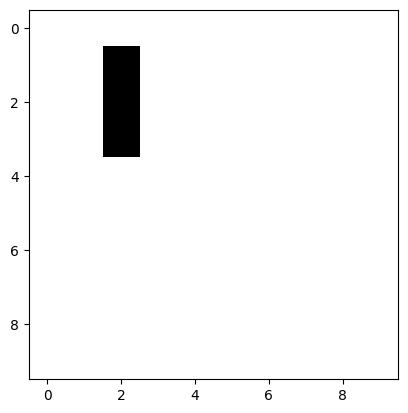

In [6]:
# Visualize the current state of the grid.
game.draw_grid()

In [7]:
# Simulate 5 more generations.
game.make_n_steps(5)
print("\nAfter 5 more steps:")
game.print_grid()


After 5 more steps:
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
0 1 1 1 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0


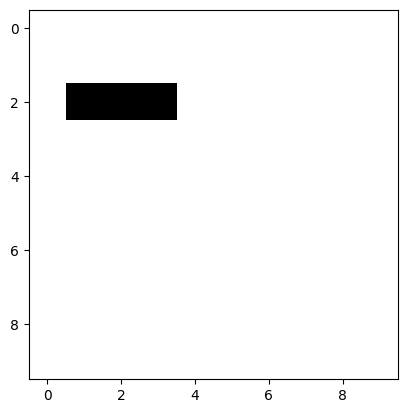

In [8]:
# Visualize the final state of the grid.
game.draw_grid()